Columns in the dataset are:

age: 
age of primary beneficiary

sex: 
insurance contractor gender -- female / male

bmi: 
Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight  (kg/m2)  using the ratio of height to weight, ideally 18.5 to 24.9

children: 
Number of children covered by health insurance / Number of dependents

smoker: 
Smoking -- yes / no

region: 
the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: 
Individual medical costs billed by health insurance
'charges' column is the target column based on all other features in the list.

Let's import the librairies

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

let's load the dataset into pandas dataframe and output the of the data

In [115]:
df = pd.read_csv('/Users/d577668/Development/Analytics/Lilibet.csv')
df.head()

,age,sex,bmi25,bmi30,children,smoker,region,charges
0,19,female,1,0,0,1,southwest,16884.92400
1,18,male,1,1,1,0,southeast,1725.55230
2,28,male,1,1,3,0,southeast,4449.46200
3,33,male,0,0,0,0,northwest,21984.47061
4,32,male,1,0,0,0,northwest,3866.85520


In [116]:
df.head()

,age,sex,bmi25,bmi30,children,smoker,region,charges
0,19,female,1,0,0,1,southwest,16884.92400
1,18,male,1,1,1,0,southeast,1725.55230
2,28,male,1,1,3,0,southeast,4449.46200
3,33,male,0,0,0,0,northwest,21984.47061
4,32,male,1,0,0,0,northwest,3866.85520


a funcrion that returns 1 if bmi > 30 and 0 for all other bmi values

Let's create a column where we'll have 1 for male an 0 for female

In [117]:
def map_sex(column):
    mapped=[]
    
    for value in column:
        
        if value == 'female':
            mapped.append(0)
        else:
            mapped.append(1)
                
    return mapped
df["sex_norm"]=map_sex(df["sex"])

In [118]:
df.head()

,age,sex,bmi25,bmi30,children,smoker,region,charges,sex_norm
0,19,female,1,0,0,1,southwest,16884.92400,0
1,18,male,1,1,1,0,southeast,1725.55230,1
2,28,male,1,1,3,0,southeast,4449.46200,1
3,33,male,0,0,0,0,northwest,21984.47061,1
4,32,male,1,0,0,0,northwest,3866.85520,1


Let's display the number of obeservationsin our data and also the basic static of our dataframe

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi25     1338 non-null   int64  
 3   bmi30     1338 non-null   int64  
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   int64  
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
 8   sex_norm  1338 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 94.2+ KB


In [120]:
df.describe()

,age,bmi25,bmi30,children,smoker,charges,sex_norm
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.816891,0.528401,1.094918,0.204783,13270.422265,0.505232
std,14.049960,0.386901,0.499379,1.205493,0.403694,12110.011237,0.500160
min,18.000000,0.000000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,1.000000,0.000000,0.000000,0.000000,4740.287150,0.000000
50%,39.000000,1.000000,1.000000,1.000000,0.000000,9382.033000,1.000000
75%,51.000000,1.000000,1.000000,2.000000,0.000000,16639.912515,1.000000
max,64.000000,1.000000,1.000000,5.000000,1.000000,63770.428010,1.000000


Ouput the list of columns in our data

In [121]:
df.columns

Index(['age', 'sex', 'bmi25', 'bmi30', 'children', 'smoker', 'region',
       'charges', 'sex_norm'],
      dtype='object')

## Exploratory Data Analysis

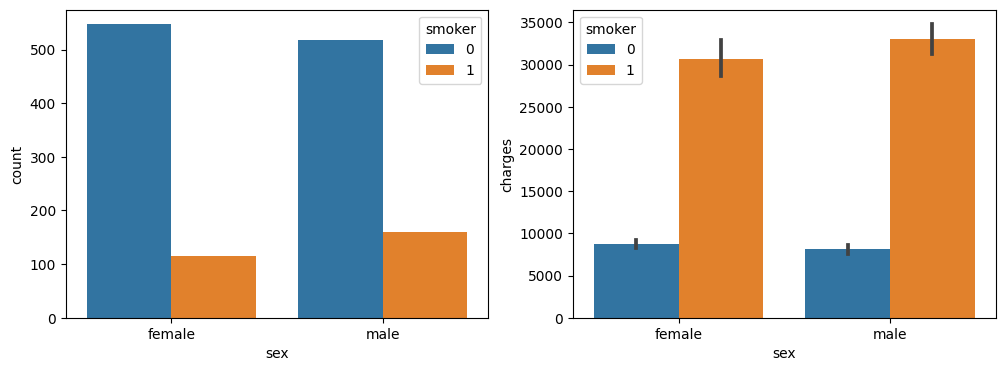

In [122]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.countplot(x='sex',data=df, hue='smoker', ax = axes[0])
sns.barplot(x='sex', y='charges',data=df, hue='smoker', ax = axes[1])
plt.show()

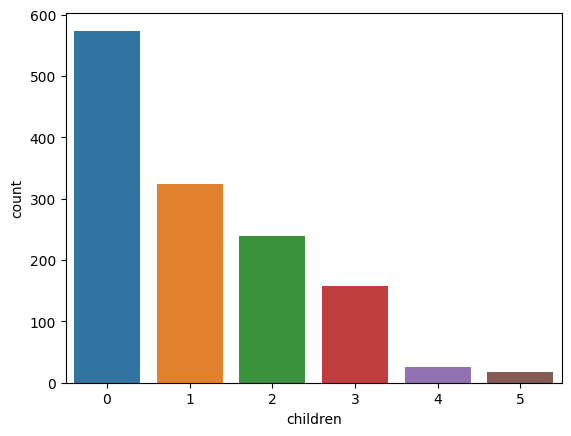

In [123]:
sns.countplot(x = 'children', data = df)
plt.show()

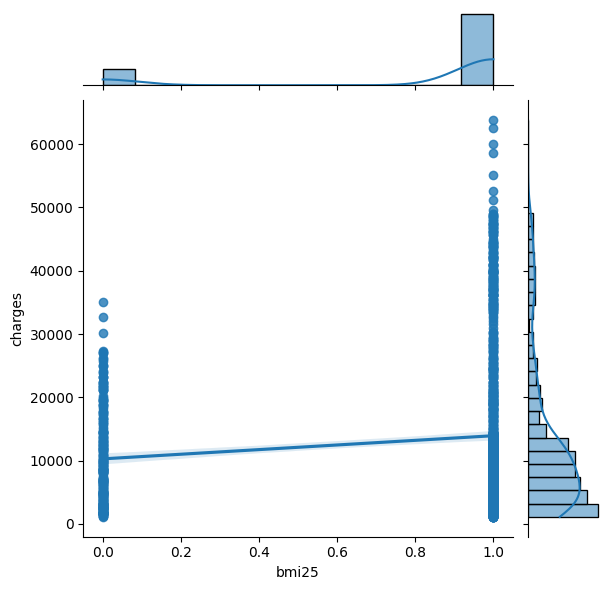

In [124]:
sns.jointplot(x = 'bmi25', y = 'charges', data = df, kind = 'reg')
plt.show()

Let's recreate the map for correlation

/var/folders/ds/g1j35xbx4k9_lbhl2h9_n3nh0000gq/T/ipykernel_54833/3614615914.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


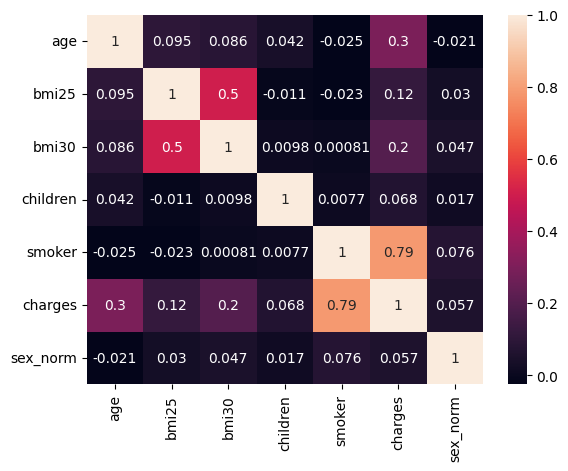

In [125]:
sns.heatmap(df.corr(), annot = True)
plt.show()

## Linear Regression Model Training

Let's separate data into X and y arrays
Will use ['age', 'bmi', 'children','smoker_norm', 'obese'] for X and ['charges'] for y

In [147]:
X = df[['age','bmi25','bmi30','children','smoker']]
y = df['charges']

Let's import train_test_split and split the data into training and test data sets .
We will use test_size=0.33, random_state=101

In [148]:
from sklearn.model_selection import train_test_split

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

Let's check the head of our X_train

In [151]:
X_train.head()

,age,bmi25,bmi30,children,smoker
612,18,1,1,0,0
65,19,1,0,0,0
42,41,0,0,1,0
533,37,1,1,0,0
586,21,0,0,3,0


Let's import the linear model

In [152]:
from sklearn import linear_model

Let's create an instance lm standing for linear model

In [153]:
lm = linear_model.LinearRegression()

Let's train the model on X_train and y_train

In [154]:
lm.fit(X_train, y_train)

LinearRegression()

The value of the intercept

In [155]:
lm.intercept_

-4686.385846067855

The value of the coefficients

In [156]:
lm.coef_

array([  241.96109115,   655.90556801,  4757.05047856,   550.31267297,
       23409.4173992 ])

Let's create a dataframe using columns from x as index and values of coefficients in a new column 'coefficient'.

In [157]:
coef=pd.DataFrame(lm.coef_,X.columns, columns=['Coefficient'])

In [136]:
coef

,Coefficient
age,241.961091
bmi25,655.905568
bmi30,2378.525239
children,550.312673
smoker,23409.417399
bmi30,2378.525239


Our model have never seen X_test, let's provide test data "X_test" to our created model and see what the predictions are. Once we get the predictions from the model, we can compare them with what we have in our y_test.

In [137]:
pred = lm.predict(X_test)

Let's genrate a scatter plot

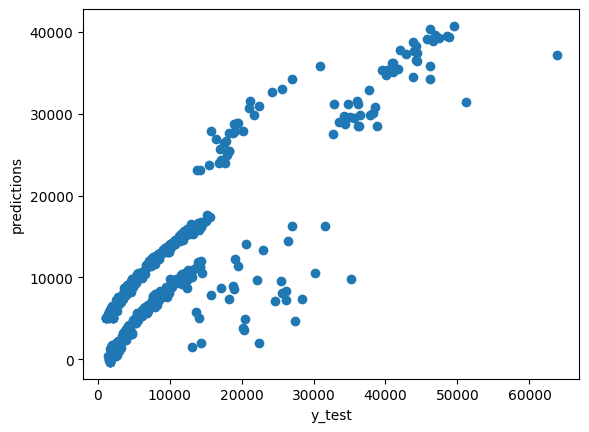

In [138]:
plt.scatter(y_test, pred)
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.show()

Let's create a residual Histogram

/var/folders/ds/g1j35xbx4k9_lbhl2h9_n3nh0000gq/T/ipykernel_54833/2370868636.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-pred, bins = 30)


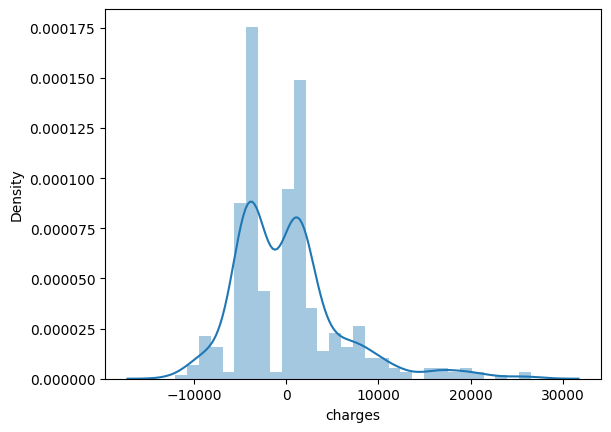

In [139]:
sns.distplot(y_test-pred, bins = 30)
plt.show()

Let's print MAE(Mean Absolute Error), MSE(Mean Square Error), RMSE(Root Mean Square Error)

In [140]:
from sklearn import metrics

In [141]:
print('MAE:',metrics.mean_absolute_error(y_test, pred))
print('MSE:',metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 4254.4525163270055
MSE: 33784312.10341229
RMSE: 5812.427384786179


We will only use age, bmi and smoker coefficients in the function

In [144]:
def calculate_insurance(age,obesity,smoking,inter,cof ):
    age_c = cof[0]
    bmi_c = cof[2]
    smoker_c = cof[4]
    return (age_c*age)+(bmi_c*obesity)+(smoker_c*smoking)+inter

We will use age = 50 and the customer is smoker (smoker = 1) for the complete range of BMI.

In [145]:
bmi = [25,30,35,40,45,50,60]
age = 50
smoker = 1
insurance=[]
for value in bmi:
    print('For BMI',value,'Insurance will be:',
          calculate_insurance(age,value,smoker,lm.intercept_,lm.coef_))

For BMI 25 Insurance will be: 90284.21709237077
For BMI 30 Insurance will be: 102176.84328876784
For BMI 35 Insurance will be: 114069.46948516488
For BMI 40 Insurance will be: 125962.09568156193
For BMI 45 Insurance will be: 137854.72187795897
For BMI 50 Insurance will be: 149747.34807435604
For BMI 60 Insurance will be: 173532.60046715016


The End